In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
import matplotlib.pyplot as plt
import io

In [ ]:
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[filename]))
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

Saving JNJ.csv to JNJ.csv


In [ ]:
features = df[['Open', 'High', 'Low', 'Close', 'Volume']].values
features = np.nan_to_num(features)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)

In [ ]:
def create_sequences(data, sequence_length=60):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length, 3])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_features)

In [ ]:
model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(X.shape[1], X.shape[2])),
    Dropout(0.3),
    LSTM(100, return_sequences=True),
    Dropout(0.3),
    LSTM(100),
    Dropout(0.3),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
train_X, train_y = X[:-60], y[:-60]
test_X, test_y = X[-60:], y[-60:]

In [ ]:
history = model.fit(train_X, train_y, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/50
439/439 [==============================] - 82s 156ms/step - loss: 9.8063e-04 - val_loss: 5.6776e-04
Epoch 2/50
439/439 [==============================] - 64s 146ms/step - loss: 4.8504e-04 - val_loss: 0.0057
Epoch 3/50
439/439 [==============================] - 63s 144ms/step - loss: 4.0349e-04 - val_loss: 7.6658e-04
Epoch 4/50
439/439 [==============================] - 66s 150ms/step - loss: 3.9818e-04 - val_loss: 0.0017
Epoch 5/50
439/439 [==============================] - 62s 142ms/step - loss: 3.1602e-04 - val_loss: 9.5520e-04
Epoch 6/50
439/439 [==============================] - 64s 145ms/step - loss: 3.5809e-04 - val_loss: 0.0077
Epoch 7/50
439/439 [==============================] - 63s 143ms/step - loss: 3.2666e-04 - val_loss: 0.0083
Epoch 8/50
439/439 [==============================] - 62s 142ms/step - loss: 3.2182e-04 - val_loss: 0.0045
Epoch 9/50
439/439 [==============================] - 64s 145ms/step - loss: 3.3723e-04 - val_loss: 0.0030
Epoch 10/50
439/439 [====

In [ ]:
predicted_prices = model.predict(test_X)
predicted_prices_extended = np.zeros((predicted_prices.shape[0], scaled_features.shape[1]))
predicted_prices_extended[:, 3] = predicted_prices[:, 0]
predicted_prices = scaler.inverse_transform(predicted_prices_extended)[:, 3]

test_y_extended = np.zeros((test_y.shape[0], scaled_features.shape[1]))
test_y_extended[:, 3] = test_y
real_prices = scaler.inverse_transform(test_y_extended)[:, 3]

2/2 [==============================] - 1s 37ms/step


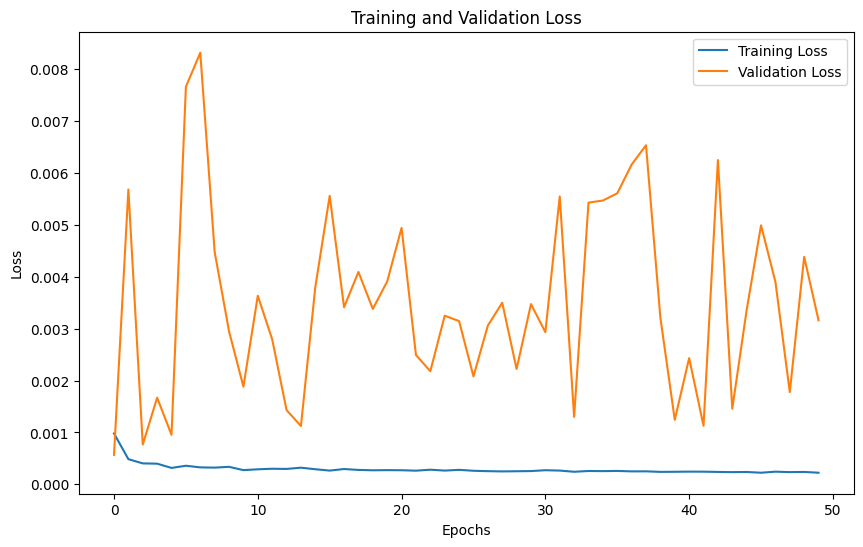

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

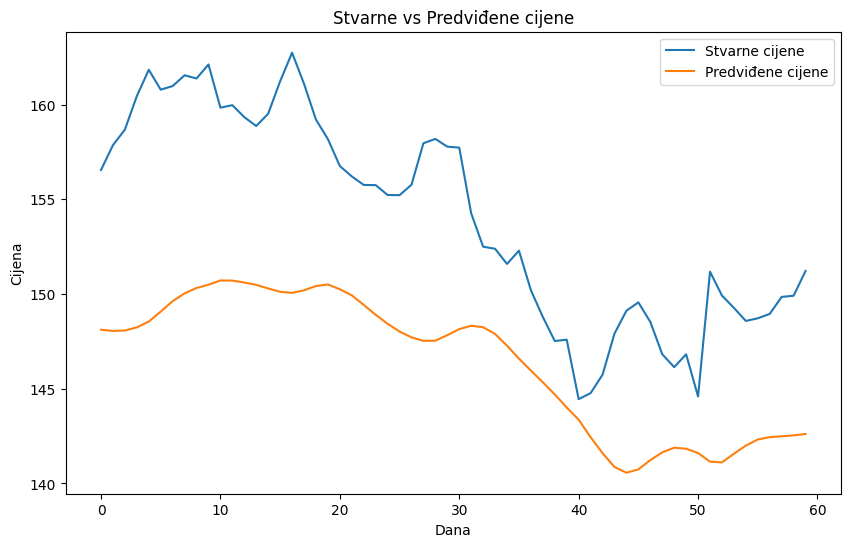

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(real_prices, label='Stvarne cijene')
plt.plot(predicted_prices, label='Predviđene cijene')
plt.title('Stvarne vs Predviđene cijene')
plt.xlabel('Dana')
plt.ylabel('Cijena')
plt.legend()
plt.show()